In [38]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [39]:
def rgb2gray(rgb):
    return np.int64(np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]))

In [40]:
img = Image.open("image.png")

img_height = img.height
img_width = img.width

img = np.asarray(img)

gray = rgb2gray(img) 

# put pixels in a 1D array by flattening out img array
flat = gray.flatten()

##plt.imshow(gray, cmap='gray')

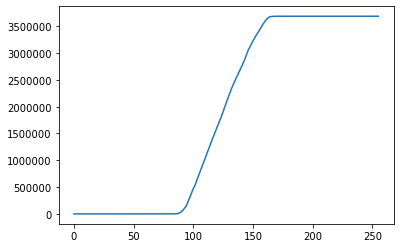

In [41]:
histogram = np.bincount(flat, minlength=256)

##plt.hist(histogram, bins=50)

cul_histogram = np.cumsum(histogram)

plt.plot(cul_histogram)

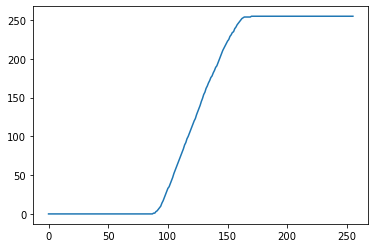

In [42]:
nch = np.floor((255*cul_histogram)/(img_height*img_width))

# cast it back to uint8 since we can't use floating point values in images
nch = nch.astype('uint8')

plt.plot(nch)

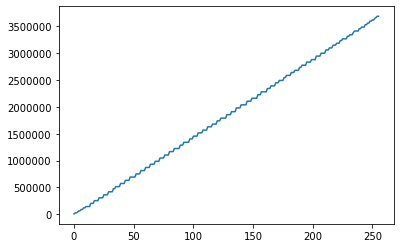

In [43]:
img_list = list(flat)

# transform pixel values to equalize
eq_img_list = [nch[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), gray.shape)

eq_img = Image.fromarray(eq_img_array, mode='L')

##plt.imshow(eq_img, cmap='gray')

eq_flat = eq_img_array.flatten()

eq_histogram = np.bincount(eq_flat, minlength=256)

eq_cul_histogram = np.cumsum(eq_histogram)

plt.plot(eq_cul_histogram)


##plt.hist(eq_histogram, bins=50)
